# Graduates By Institutions

---

## Main Question

1. How does the number of male and female graduates get affected as the year goes by ?
2. What is the market share of each instituion for number of graduates ?

---

## List of URLs used:


1. Graduates by Institutions<br>
   https://data.gov.sg/dataset/intake-enrolment-and-graduates-by-institutions?resource_id=2264a6ed-51f5-45d6-accb-1a980e32e632

     
2. Market Share<br>
   https://www.educba.com/market-share-formula/

---

## Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

In [3]:
graduatesData = pd.read_csv('graduates-by-institutions.csv', index_col = 'year')
graduatesData

,sex,nus,ntu,smu,sit,sutd,suss,nie,singapore_polytechnic,ngee_ann_polytechnic,temasek_polytechnic,nanyang_polytechnic,republic_polytechnic,lasalle_diploma,lasalle_degree,nafa_diploma,nafa_degree,ite
year,,,,,,,,,,,,,,,,,,
1983,MF,2905,0,-,-,-,-,597,1624,928,-,-,-,-,-,-,-,6779
1983,F,1508,0,-,-,-,-,453,316,343,-,-,-,-,-,-,-,905
1984,MF,3409,0,-,-,-,-,875,1773,1293,-,-,-,-,-,-,-,6281
1984,F,1826,0,-,-,-,-,687,371,456,-,-,-,-,-,-,-,1785
1985,MF,3454,557,-,-,-,-,531,1862,1543,-,-,-,-,-,-,-,7597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,F,3332,3066,1030,539,93,-,1076,1984,2512,2495,2727,2493,226,286,365,18,4863
2017,MF,6446,6174,1779,1494,267,-,1292,4924,4886,5012,4999,4389,331,466,591,34,12858
2017,F,3350,3266,920,695,107,-,899,2000,2400,2516,2605,2407,237,318,447,22,4808


### Background Information 

General Information:

**What is Market Share ?**

The term “market share” of a company refers to the percentage of the market’s total sales that are being made by that company over a certain period of time, usually a year. In other words, if the entire market sales form a big pie, then the market share of a company means the size of the piece of the pie taken by the company. 



Datasets:

1. `graduatesData`

  - The datasets show the number of full-time graduates in education institutions.
  - The variable `sex` which consist of the values 'MF' and 'F', represents Male and Female respectively.
  - University figures are for first degree (Undergraduates) only.
  - National Institute of Education (NIE) figures are for Diplomas and Post-graduate Diplomas in education-related subjects. BA / BSc (Education) figures are included under Nanyang Technological University.
  - Polytechnic figures are for full-time diploma courses only. 
  - LASALLE College of the Arts and Nanyang Academy of Fine Arts (NAFA) first degree figures are for publicly-funded full-time courses (started in 2012 and 2011 respectively) only.
  - Institute of Technical Education (ITE) was established in 1992 to replace the former Vocational & Industrial Training Board. ITE figures exclude apprentices.
  - The dataset coverage period ranges from 1982-01-01 to 2018-12-31.

The impact of education on the country's economic performance is mainly indicated by the productivity of the labour force which is directly related to the quality of the human capital. 

One way to increase the quality of the human capital is by the increasing the number of graduates from higher education. By doing so, the number of educated workers will increases and allowing them to work more efficiently. Hence, the country's economy will become more productive and see a faster growth. 

Education institutions which are listed in the datasets.

In [4]:
institutions = ['nus', 'ntu', 'smu', 'sit', 'sutd', 'suss', 'nie', 'singapore_polytechnic', 'ngee_ann_polytechnic', 'temasek_polytechnic', 'nanyang_polytechnic', 'republic_polytechnic', 'lasalle_diploma', 'lasalle_degree', 'nafa_diploma', 'nafa_degree', 'ite']

---

## Data Cleaning

As you may have noticed, some of the values in the datasets are set to '-'. Which means the institutions haven't been established at the time yet. Hence, we can ignore the time period where the values are set to '-'.

In [5]:
# Replace the '-' value to np.NaN
graduatesData = graduatesData.replace('-', np.NaN)

To have a better structure for analysis, all the categorical variables should be a `str` type. While numerical variables should be an `int64` or `float64` type.

**Categorical Variables**
1. `year`
2. `sex`
3. `institutions`

**Numerical Variables**
1. `number of graduates`

In [6]:
# Convert the number of graduates to an Integer Datatype for each institution
for institution in institutions:
    graduatesData[institution] = pd.to_numeric(graduatesData[institution])

---

## Data Transformation

### Group the number of graduates according to its gender over the years

The dataframe `maleGraduates` and `femaleGraduates` represents the number of male and female graduates respectively across institutions. 

In [12]:
# Make sub dataframe for each type of gender (Male and Female) and remove the column 'sex' from the dataframe 
maleGraduates = graduatesData[graduatesData['sex'] == 'MF'].drop(columns=['sex'])
femaleGraduates = graduatesData[graduatesData['sex'] == 'F'].drop(columns=['sex'])

The dataframe `latestGraduatesData` represents the number of male and female graduates across institutions in 2018. Which is later grouped into two main dataframes, `uniGraduates` represents the number of graduates from university and `polyGraduates` represents the number of graduates from polytechnics.

In [13]:
# Latest number of graduates
latestGraduatesData = maleGraduates.iloc[-1]+femaleGraduates.iloc[-1]

# Universities
universities = ['nus', 'ntu', 'smu', 'sit', 'sutd', 'suss']
uniGraduates = latestGraduatesData.loc[universities]

# Polytechnics
polytechnics = ['singapore_polytechnic', 'ngee_ann_polytechnic', 'temasek_polytechnic', 'nanyang_polytechnic', 'republic_polytechnic']
polyGraduates = latestGraduatesData.loc[polytechnics]

---

## Data Analysis

### Comparison between the number of male and female graduates over the years

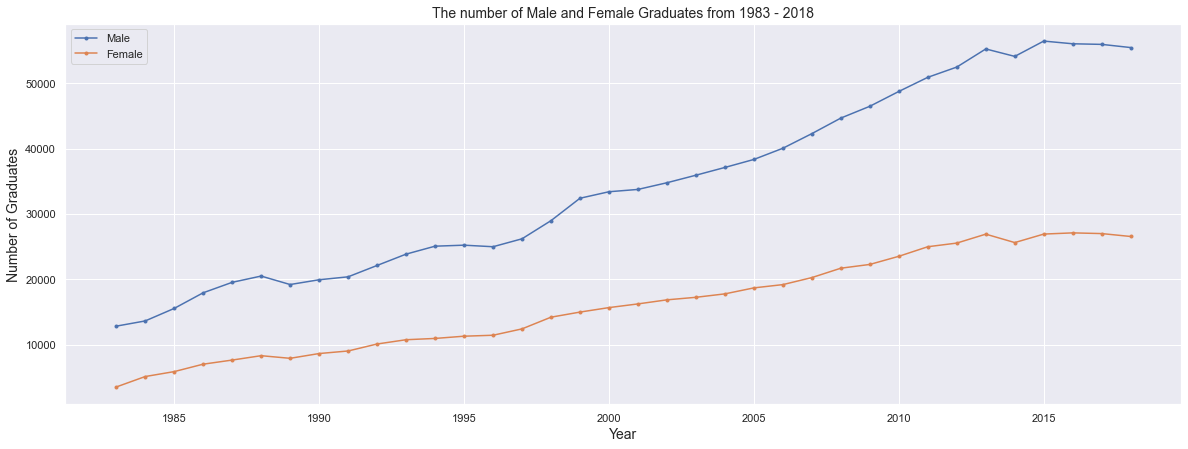

In [14]:
# Sets figure size
fig, ax = plt.subplots()
fig.set_size_inches([20,7])

# Plotting a Comparative Line Chart between the 2 category over the years
ax.plot(maleGraduates.index, maleGraduates.sum(axis=1), marker='.', label='Male')
ax.plot(femaleGraduates.index, femaleGraduates.sum(axis=1), marker='.', label='Female')

# Sets X and Y Axis Label
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Graduates', fontsize=14)

# Legend to indicate the labels of the graph
plt.legend()

# Set Graph Title
plt.title('The number of Male and Female Graduates from 1983 - 2018', fontsize = 14)

# Display the graph
plt.show()

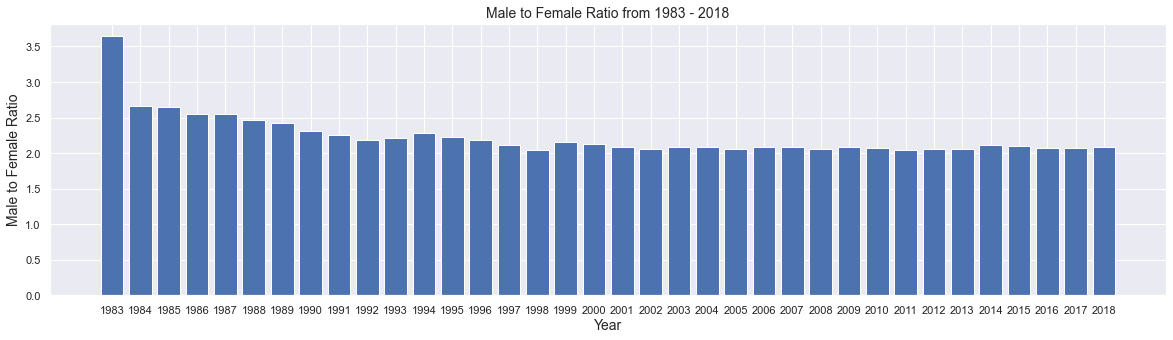

In [15]:
# Sets Figure Size
fig, ax = plt.subplots()
fig.set_size_inches([20,5])

# Plotting Bar Chart
ax.bar(maleGraduates.index, maleGraduates.sum(axis=1)/femaleGraduates.sum(axis=1)) 

# Sets X and Y Axis Label
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Male to Female Ratio', fontsize = 14)

# Setting the x values in a consecuting intervals (Consecutive Years)
ax.set_xticks(maleGraduates.index)

# Set Graph Title
plt.title ('Male to Female Ratio from 1983 - 2018', fontsize = 14)

# Display the graph
plt.show()

Summary:
1. The long term trends of both male and female graduates has been steadily increasing in the past. In the recent years, the number of male and female graduates has started to slowly decreasing. 
2. Assuming the birth rate of male and female population is always equal to one another. The value of male to female ratio has been steadily decreasing over the years with a value of 2.088581 in 2018. Although the number has seen significant decrease compared to the past, the male to female ratio has stagnated for the recent years with the number of male graduates more than double the number of female graduates. In oder 
3. 

Summary:

As shown from the line chart trend above we could see that number of female and male graduates are increasing over the years. The fact that the number of graduates has been increasing over the years is a good indicator. Since, the number of graduates are related to the size of labour force. That means the economy is growing and jobs are created.

As you can see there is a huge gender gap of the number of male and female graduates shown with the two lines in the line chart. This gender imbalance in the number of graduates is an existing gender stereotypes which has been a problem in the past till now. However, due to the government effort in narrowing the gender gap the male to female ratio has been slowly decreasing over the years. 

The gender gap that exist in higher education mainly is because of the gender stereotypes in which certain field are being dominated by one gender, such as the STEM field which is being dominated by the male. To close the gender gap in this fields the government should break those gender stereotypes by providing female role models especially on early education. Female scientist can be one of those strong role models to show that it is possible for female to succeed in those fields. 

Another way is for the government to implement non competitive learning environment on early educational institutions. Through research it has been found that female are generally less competitive than male. Hence, by introducing these environments it would encourage more females to take part in learning in these environments.

### Latest Market Share of graduates across institutions

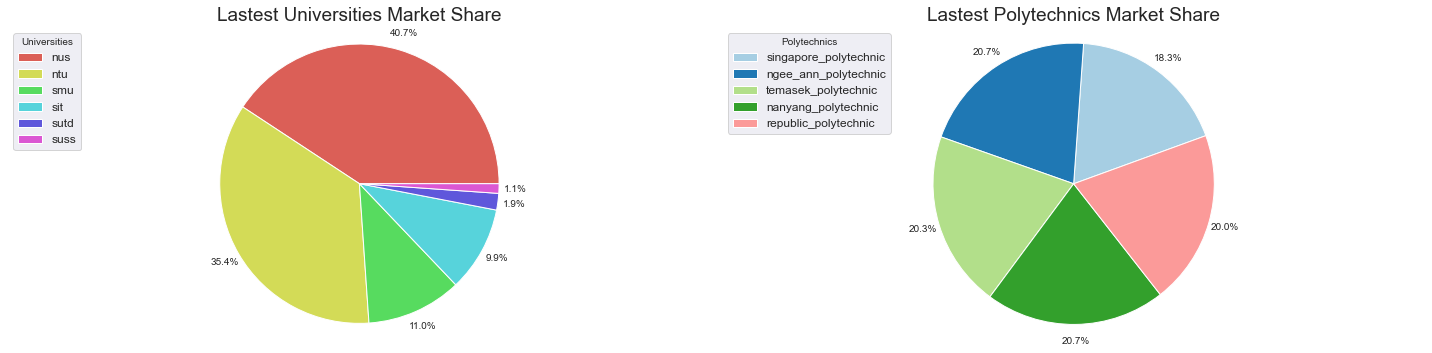

In [17]:
# Sets Figure Size
fig, ax = plt.subplots(1, 2)
fig.set_size_inches([20,5])

# Plot the Pie Chart
ax[0].pie(uniGraduates, colors = sb.color_palette('hls'), labels=None, autopct='%1.1f%%', startangle=0, pctdistance=1.12)
ax[1].pie(polyGraduates, colors = sb.color_palette('Paired'), labels=None, autopct='%1.1f%%', startangle=20, pctdistance=1.12)

# Adding legend 
ax[0].legend(universities, title ='Universities', loc ='upper left', fontsize = 12) 
ax[1].legend(polytechnics, title ='Polytechnics', loc ='upper left', fontsize = 12) 

# Set Graph Title
ax[0].set_title('Lastest Universities Market Share', fontsize = 19)
ax[1].set_title('Lastest Polytechnics Market Share', fontsize = 19)

# Equal aspect ratio ensures that pie is drawn as a circle
ax[0].axis('equal')
ax[1].axis('equal')
plt.tight_layout()

# Display the graph
plt.show()

Summary:

Universities market share:
1. NUS (40.7%)
2. NTU (35.4%)
3. SMU (11.0%)
4. SIT (9.9%)
5. SUTD (1.9%)
6. SUSS (1.1%)

Polytechnics market share:
1. Ngee Ann Polytechnic and Nanyang Polytechnic (20.7%)
2. Temasek Polytechnic (20.3%)
3. Republic Polytechnic (20.0%)
4. Singapore Polytechnic (18.3%)